# **1. Packages**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from IPython.core.display import HTML 

# **2. Functions**

In [ ]:
  def visualize(path_to_data):

    # loading dataset
    data = pd.read_csv(path_to_data)

    # removing Nan if any in dataset
    data = data.dropna() 

    # remove first coloumn
    data = data.iloc[: , 1:] 

    # to display the whole columns and rows
    pd.set_option("display.max_rows", None, "display.max_columns", None)

    print("-------------Head-------------\n")
    display(HTML(data.head().to_html()))
    print("\n------------------------------\n")
    #print("-------------Head-------------\n",data.head(),"\n------------------------------",'\n')

    # remove last coloumn to deal with the input data
    df = data.pop('Churn') 

    numericalCol = data.select_dtypes("number").columns
    categoricalCol = data.select_dtypes("object").columns
    numericalCol = list(set(numericalCol))
    categoricalCol = list(set(categoricalCol))

    print("-------------Types of input data-------------","\nNumerical columns: ",numericalCol,'\n')
    print("Categorical columns: ",categoricalCol,"\n---------------------------------------------"'\n')
    
    print("-------------Data columns to be removed-------------",'\nCLIENTNUM - Education_Level - Marital_Status - Income_Category - Card_Category - Avg_Open_To_Buy - Avg_Utilization_Ratio',"\n----------------------------------------------------",'\n')

    data.drop(['CLIENTNUM','Education_Level','Marital_Status','Income_Category','Card_Category','Avg_Open_To_Buy','Avg_Utilization_Ratio'], axis='columns', inplace=True)

    print("-------------Basic statistics-------------\n")
    display(HTML(data.describe().to_html()))
    print('\n------------------------------------------\n')
    #print("-------------Basic statistics-------------\n",data.describe(),'\n------------------------------------------\n')

    print("------------Label distribution, Correlation, Distribution for all continuous value------------\n")
    print("The classes are balanced, since No. of examples of class 0 is almost same of No. of examples in class 1")

    data['Churn']=df
    
    # Label distribution
    sns.displot(data, x = "Churn")

    # Correlation
    plt.figure(figsize=(15, 10))
    sns.heatmap(data.corr(), annot=True, cmap="Blues")
  
    data.pop('Churn') 

    # Distribution for all continuous value
    data.hist(column=['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1'],bins=50, figsize=(35,15))


In [ ]:
def preprocess_data(data):
  
    data.drop(['Unnamed: 0','CLIENTNUM','Education_Level','Marital_Status','Income_Category','Card_Category','Avg_Open_To_Buy','Avg_Utilization_Ratio'], axis='columns', inplace=True)

    # Preprocess categorical data
    data = pd.get_dummies(data, columns=['Attrition_Flag','Gender'], prefix = ['Attrition_Flag','Gender'])

    # Scaling continuous data
    scaling = MinMaxScaler()
    data["Customer_Age"]=scaling.fit_transform(data[["Customer_Age"]])
    data["Dependent_count"]=scaling.fit_transform(data[["Dependent_count"]])
    data["Months_on_book"]=scaling.fit_transform(data[["Months_on_book"]])
    data["Total_Relationship_Count"]=scaling.fit_transform(data[["Total_Relationship_Count"]])
    data["Months_Inactive_12_mon"]=scaling.fit_transform(data[["Months_Inactive_12_mon"]])
    data["Contacts_Count_12_mon"]=scaling.fit_transform(data[["Contacts_Count_12_mon"]])
    data["Credit_Limit"]=scaling.fit_transform(data[["Credit_Limit"]])
    data["Total_Revolving_Bal"]=scaling.fit_transform(data[["Total_Revolving_Bal"]])
    data["Total_Amt_Chng_Q4_Q1"]=scaling.fit_transform(data[["Total_Amt_Chng_Q4_Q1"]])
    data["Total_Trans_Ct"]=scaling.fit_transform(data[["Total_Trans_Ct"]])
    data["Total_Ct_Chng_Q4_Q1"]=scaling.fit_transform(data[["Total_Ct_Chng_Q4_Q1"]])
    data["Total_Trans_Amt"]=scaling.fit_transform(data[["Total_Trans_Amt"]])

    # Since one hot add new columns, move Churn column to the last again
    df = data.pop('Churn') 
    data['Churn']=df

    return data

In [ ]:
def split(data): 
    
    # loading the data in numpy matrix
    y = data.iloc[:, -1].values
    X = data.iloc[:, :-1].values

    # considering theta0
    ones = [1 for i in range(len(y))]
    X = np.column_stack((ones, X))
  
    train_X, test_X, train_y, test_Y = train_test_split(X, y, test_size=0.20)

    return train_X, test_X, train_y, test_Y

# **3. Main**

-------------Head-------------



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0



------------------------------

-------------Types of input data------------- 
Numerical columns:  ['Dependent_count', 'Avg_Utilization_Ratio', 'Credit_Limit', 'Total_Ct_Chng_Q4_Q1', 'Total_Relationship_Count', 'Months_on_book', 'Total_Amt_Chng_Q4_Q1', 'Customer_Age', 'Total_Trans_Ct', 'CLIENTNUM', 'Total_Revolving_Bal', 'Months_Inactive_12_mon', 'Total_Trans_Amt', 'Contacts_Count_12_mon', 'Avg_Open_To_Buy'] 

Categorical columns:  ['Gender', 'Card_Category', 'Education_Level', 'Income_Category', 'Marital_Status', 'Attrition_Flag'] 
---------------------------------------------

-------------Data columns to be removed------------- 
CLIENTNUM - Education_Level - Marital_Status - Income_Category - Card_Category - Avg_Open_To_Buy - Avg_Utilization_Ratio 
---------------------------------------------------- 

-------------Basic statistics-------------



,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,0.759941,4404.086304,64.858695,0.712222
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,0.219207,3397.129254,23.472570,0.238086
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,0.000000,510.000000,10.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,0.631000,2155.500000,45.000000,0.582000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,0.736000,3899.000000,67.000000,0.702000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,0.859000,4741.000000,81.000000,0.818000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,3.397000,18484.000000,139.000000,3.714000



------------------------------------------

------------Label distribution, Correlation, Distribution for all continuous value------------

The classes are balanced, since No. of examples of class 0 is almost same of No. of examples in class 1


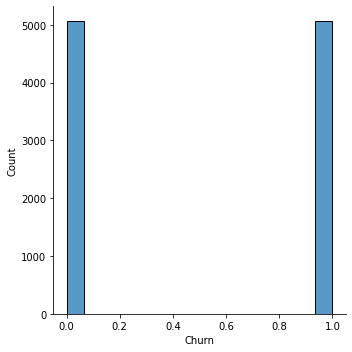

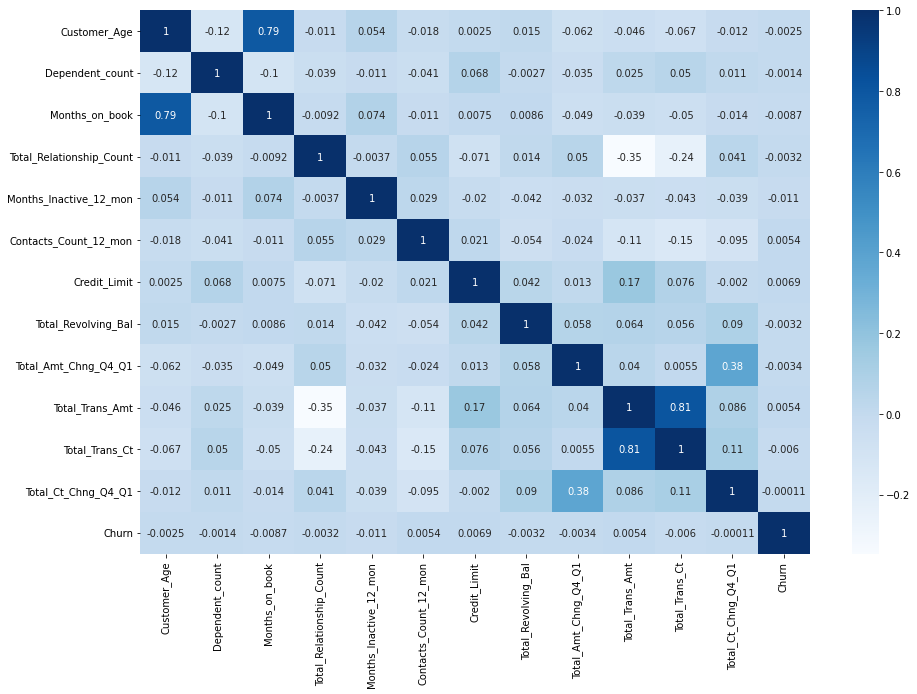

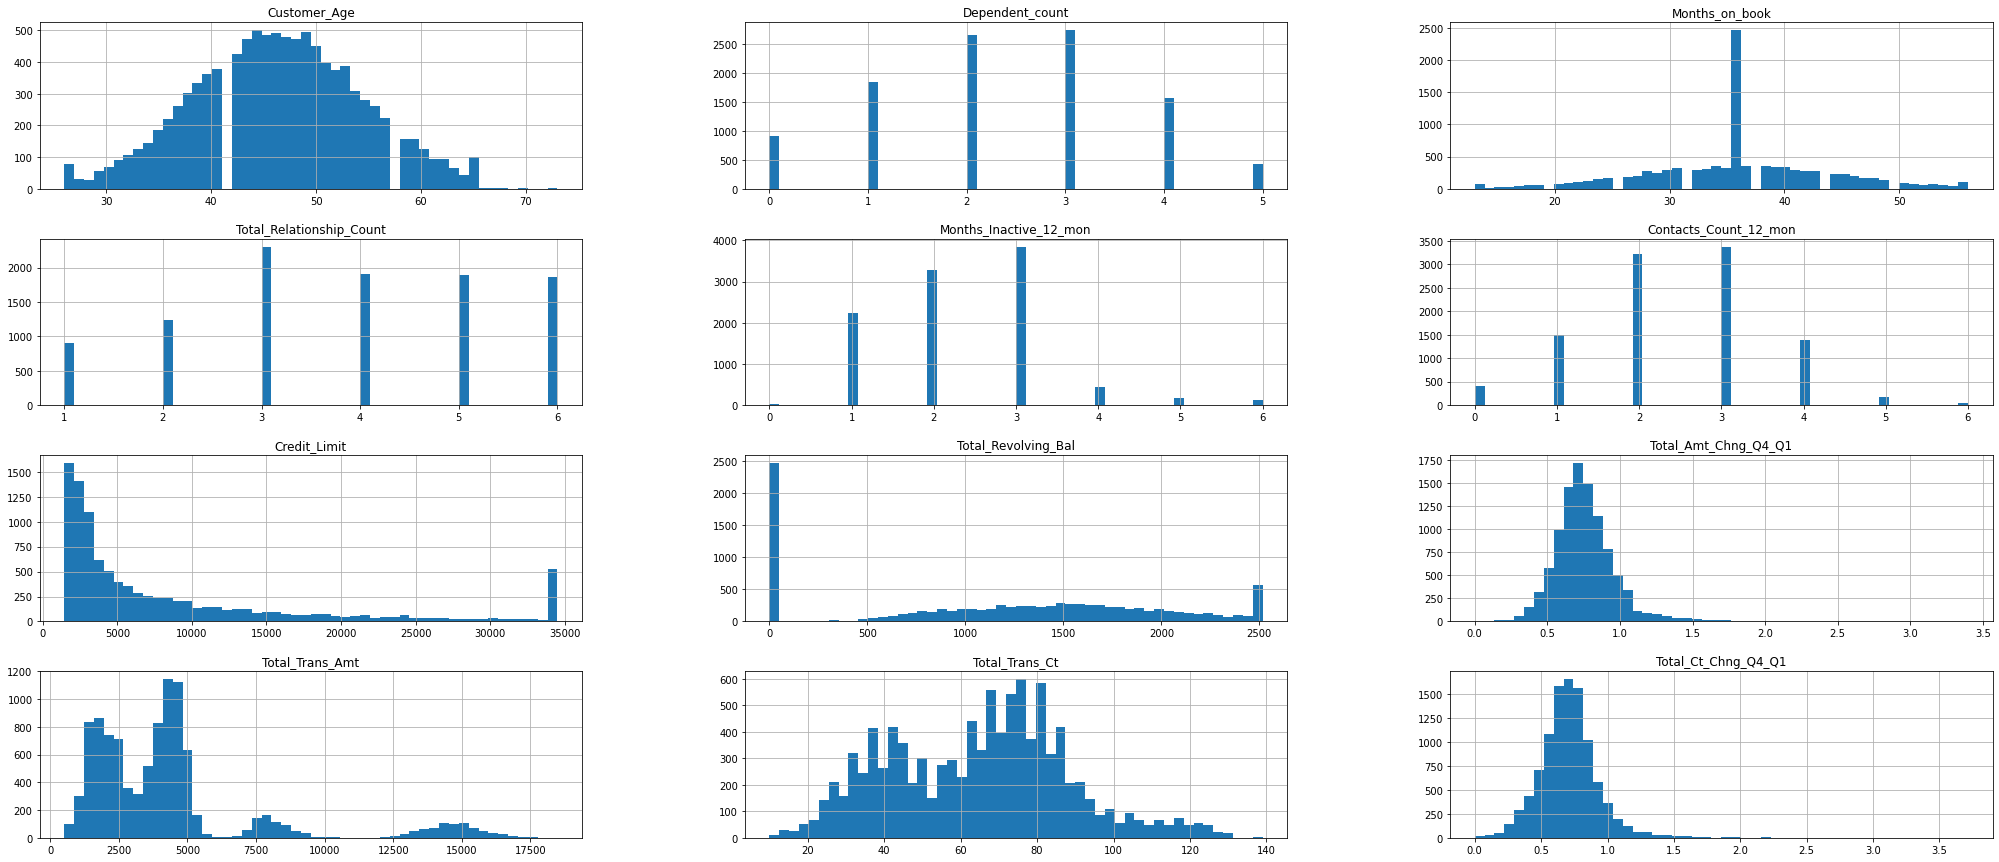

In [ ]:
path_to_data="BankChurners1.csv"

# loading dataset
data = pd.read_csv(path_to_data)

# removing Nan if any in dataset
data = data.dropna() 

visualize(path_to_data)

preprocessData=preprocess_data(data)

train_X, test_X, train_y, test_Y = split(preprocessData)